In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from extra_support_vector_machines import IMAGES_PATH

In [2]:
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
# Download data
data_root = 'https://github.com/ageron/data/raw/main/'
lifesat = pd.read_csv(f'{data_root}lifesat/lifesat.csv')
X = lifesat[['GDP per capita (USD)']].values
y = lifesat[['Life satisfaction']].values

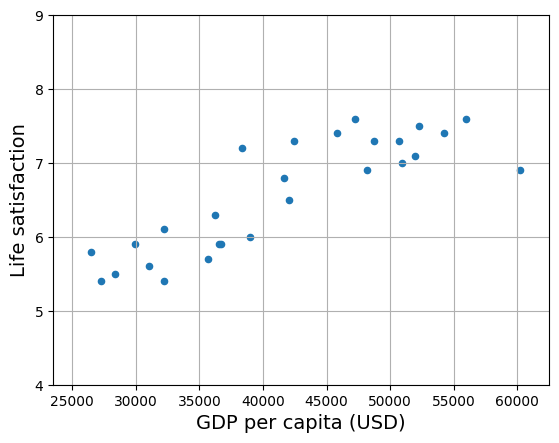

In [5]:
lifesat.plot(kind='scatter', x='GDP per capita (USD)', y='Life satisfaction', grid=True)
plt.axis([23_500, 62_500, 4, 9])
plt.show()

In [6]:
model = LinearRegression()

In [7]:
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
X_new = [[33_442.8]]

In [9]:
print(model.predict(X_new))

[[6.01610329]]


In [11]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)

model.fit(X, y)

print(model.predict(X_new))

[[5.73333333]]


# Generating Data and Figures

In [12]:
from pathlib import Path

IMAGES_PATH = Path() / 'images' / 'fundamentals'
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = IMAGES_PATH / f'{fig_id}.{fig_extension}'
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [13]:
import urllib.request

datapath = Path() / 'datasets' / 'lifesat'
datapath.mkdir(parents=True, exist_ok=True)

data_root = 'http://github.com/ageron/data/raw/main/'
for filename in ('oecd_bli.csv', 'gdp_per_capita.csv'):
    if not (datapath / filename).is_file():
        print(f'Downloading {filename}...')
        url = f'{data_root}lifesat/{filename}'
        urllib.request.urlretrieve(url, datapath / filename)

In [15]:
oecd_bli = pd.read_csv(datapath / 'oecd_bli.csv')
gdp_per_capita = pd.read_csv(datapath / 'gdp_per_capita.csv')

In [16]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN
